# INTRODUCTION TO ARTIFICIAL NEURAL NETWORKS WITH KERAS
Birds inspired us to fly, burdock plants inspired Velcro, and nature has inspired countless more inventions. It seems only logical, then, to look at the brain’s architecture for inspiration on how to build an intelligent machine. This is the logic that sparked artificial neural networks (ANNs), machine learning models inspired by the networks of biological neurons found in our brains. However, although planes were inspired by birds, they don’t have to flap their wings to fly. Similarly, ANNs have gradually become quite different from their biological cousins. Some researchers even argue that we should drop the biological analogy altogether (e.g., by saying “units” rather than “neurons”), lest we restrict our creativity to biologically plausible systems.

ANNs are at the very core of deep learning. They are versatile, powerful, and scalable, making them ideal to tackle large and highly complex machine learning tasks such as classifying billions of images (e.g., Google Images), powering speech recognition services (e.g., Apple’s Siri), recommending the best videos to watch to hundreds of millions of users every day (e.g., YouTube), or learning to beat the world champion at the game of Go (DeepMind’s AlphaGo).

The first part of this chapter introduces artificial neural networks, starting with a quick tour of the very first ANN architectures and leading up to multilayer perceptrons, which are heavily used today (other architectures will be explored in the next chapters). In the second part, we will look at how to implement neural networks using TensorFlow’s Keras API. This is a beautifully designed and simple high-level API for building, training, evaluating, and running neural networks. But don’t be fooled by its simplicity: it is expressive and flexible enough to let you build a wide variety of neural network architectures. In fact, it will probably be sufficient for most of your use cases. And should you ever need extra flexibility, you can always write custom Keras components using its lower-level API, or even use TensorFlow directly, as you will see in Chapter 12.

But first, let’s go back in time to see how artificial neural networks came to be!

# FROM BIOLOGICAL TO ARTIFICIAL NEURONS
Surprisingly, ANNs have been around for quite a while: they were first introduced back in 1943 by the neurophysiologist Warren McCulloch and the mathematician Walter Pitts. In their landmark paper⁠2 “A Logical Calculus of Ideas Immanent in Nervous Activity”, McCulloch and Pitts presented a simplified computational model of how biological neurons might work together in animal brains to perform complex computations using propositional logic. This was the first artificial neural network architecture. Since then many other architectures have been invented, as you will see.

The early successes of ANNs led to the widespread belief that we would soon be conversing with truly intelligent machines. When it became clear in the 1960s that this promise would go unfulfilled (at least for quite a while), funding flew elsewhere, and ANNs entered a long winter. In the early 1980s, new architectures were invented and better training techniques were developed, sparking a revival of interest in connectionism, the study of neural networks. But progress was slow, and by the 1990s other powerful machine learning techniques had been invented, such as support vector machines (see Chapter 5). These techniques seemed to offer better results and stronger theoretical foundations than ANNs, so once again the study of neural networks was put on hold.

We are now witnessing yet another wave of interest in ANNs. Will this wave die out like the previous ones did? Well, here are a few good reasons to believe that this time is different and that the renewed interest in ANNs will have a much more profound impact on our lives:

- There is now a huge quantity of data available to train neural networks, and ANNs frequently outperform other ML techniques on very large and complex problems.

- The tremendous increase in computing power since the 1990s now makes it possible to train large neural networks in a reasonable amount of time. This is in part due to Moore’s law (the number of components in integrated circuits has doubled about every 2 years over the last 50 years), but also thanks to the gaming industry, which has stimulated the production of powerful GPU cards by the millions. Moreover, cloud platforms have made this power accessible to everyone.

- The training algorithms have been improved. To be fair they are only slightly different from the ones used in the 1990s, but these relatively small tweaks have had a huge positive impact.

- Some theoretical limitations of ANNs have turned out to be benign in practice. For example, many people thought that ANN training algorithms were doomed because they were likely to get stuck in local optima, but it turns out that this is not a big problem in practice, especially for larger neural networks: the local optima often perform almost as well as the global optimum.

- ANNs seem to have entered a virtuous circle of funding and progress. Amazing products based on ANNs regularly make the headline news, which pulls more and more attention and funding toward them, resulting in more and more progress and even more amazing products.

# BIOLOGICAL NEURONS
Before we discuss artificial neurons, let’s take a quick look at a biological neuron (represented in Figure 10-1). It is an unusual-looking cell mostly found in animal brains. It’s composed of a cell body containing the nucleus and most of the cell’s complex components, many branching extensions called dendrites, plus one very long extension called the axon. The axon’s length may be just a few times longer than the cell body, or up to tens of thousands of times longer. Near its extremity the axon splits off into many branches called telodendria, and at the tip of these branches are minuscule structures called synaptic terminals (or simply synapses), which are connected to the dendrites or cell bodies of other neurons. Biological neurons produce short electrical impulses called action potentials (APs, or just signals), which travel along the axons and make the synapses release chemical signals called neurotransmitters. When a neuron receives a sufficient amount of these neurotransmitters within a few milliseconds, it fires its own electrical impulses (actually, it depends on the neurotransmitters, as some of them inhibit the neuron from firing).

Figure 10-1. A biological neuron
![neuron](../images/neuron.png)

Thus, individual biological neurons seem to behave in a simple way, but they’re organized in a vast network of billions, with each neuron typically connected to thousands of other neurons. Highly complex computations can be performed by a network of fairly simple neurons, much like a complex anthill can emerge from the combined efforts of simple ants. The architecture of biological neural networks (BNNs) is the subject of active research, but some parts of the brain have been mapped. These efforts show that neurons are often organized in consecutive layers, especially in the cerebral cortex (the outer layer of the brain), as shown in Figure 10-2.

Figure 10-2. Multiple layers in a biological neural network (human cortex)
![layers_neurons](../images/layers_neurons.png)

# LOGICAL COMPUTATIONS WITH NEURONS
McCulloch and Pitts proposed a very simple model of the biological neuron, which later became known as an artificial neuron: it has one or more binary (on/off) inputs and one binary output. The artificial neuron activates its output when more than a certain number of its inputs are active. In their paper, McCulloch and Pitts showed that even with such a simplified model it is possible to build a network of artificial neurons that can compute any logical proposition you want. To see how such a network works, let’s build a few ANNs that perform various logical computations (see Figure 10-3), assuming that a neuron is activated when at least two of its input connections are active.

Figure 10-3. ANNs performing simple logical computations
![ANN_simple_logic](../images/ANN_simple_logic.png)


Let’s see what these networks do:

- The first network on the left is the identity function: if neuron A is activated, then neuron C gets activated as well (since it receives two input signals from neuron A); but if neuron A is off, then neuron C is off as well.

- The second network performs a logical AND: neuron C is activated only when both neurons A and B are activated (a single input signal is not enough to activate neuron C).

- The third network performs a logical OR: neuron C gets activated if either neuron A or neuron B is activated (or both).

- Finally, if we suppose that an input connection can inhibit the neuron’s activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A is active and neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.

You can imagine how these networks can be combined to compute complex logical expressions (see the exercises at the end of the chapter for an example).

# THE PERCEPTRON
The perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron (see Figure 10-4) called a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU). The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU computes a linear function of its inputs: 

$z = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b = \mathbf{w}^\top \mathbf{x} + b$

Then it applies a step function to the result: 

$h_{\mathbf{w}}(\mathbf{x}) = \text{step}(z)$

So it’s almost like logistic regression, except it uses a step function instead of the logistic function (Chapter 4). Just like in logistic regression, the model parameters are the input weights $\mathbf{w}$ and the bias term $b$.


Figure 10-4. TLU: an artificial neuron that computes a weighted sum of its inputs w⊺ x, plus a bias term b, then applies a step function
![TLU](../images/TLU.png)


The most common step function used in perceptrons is the Heaviside step function (see Equation 10-1). Sometimes the sign function is used instead.

Equation 10-1. Common step functions used in perceptrons (assuming threshold = 0)\
heaviside $(z) = \begin{cases} 0 & \text{if } z < 0 \\ 1 & \text{if } z \geq 0 \end{cases}$\
$ sign(z) = \begin{cases} -1 & \text{if } z < 0 \\ 0 & \text{if } z = 0 \\ 1 & \text{if } z > 0 \end{cases}$

A single TLU can be used for simple linear binary classification. It computes a linear function of its inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise, it outputs the negative class. This may remind you of logistic regression (Chapter 4) or linear SVM classification (Chapter 5). You could, for example, use a single TLU to classify iris flowers based on petal length and width. Training such a TLU would require finding the right values for $w_1$, $w_2$, and $b$ (the training algorithm is discussed shortly).

A perceptron is composed of one or more TLUs organized in a single layer, where every TLU is connected to every input. Such a layer is called a fully connected layer, or a dense layer. The inputs constitute the input layer. And since the layer of TLUs produces the final outputs, it is called the output layer. For example, a perceptron with two inputs and three outputs is represented in Figure 10-5.

Figure 10-5. Architecture of a perceptron with two inputs and three output neurons
![perceptron_two_in_three_out](../images/perceptron_two_in_three_out.png)


This perceptron can classify instances simultaneously into three different binary classes, which makes it a multilabel classifier. It may also be used for multiclass classification.

Thanks to the magic of linear algebra, Equation 10-2 can be used to efficiently compute the outputs of a layer of artificial neurons for several instances at once.

Equation 10-2. Computing the outputs of a fully connected layer
$h_{W,b}(X) = \phi(XW + b)$

In this equation:
- As always, $X$ represents the matrix of input features. It has one row per instance and one column per feature.

- The weight matrix $W$ contains all the connection weights. It has one row per input and one column per neuron.

- The bias vector $b$ contains all the bias terms: one per neuron.

- The function $\phi$ is called the activation function: when the artificial neurons are TLUs, it is a step function (we will discuss other activation functions shortly).


NOTE
In mathematics, the sum of a matrix and a vector is undefined. However, in data science, we allow “broadcasting”: adding a vector to a matrix means adding it to every row in the matrix. So, $XW + b$ first multiplies $X$ by $W$—which results in a matrix with one row per instance and one column per output—then adds the vector $b$ to every row of that matrix, which adds each bias term to the corresponding output, for every instance. Moreover, $\phi$ is then applied itemwise to each item in the resulting matrix.

So, how is a perceptron trained? The perceptron training algorithm proposed by Rosenblatt was largely inspired by Hebb’s rule. In his 1949 book The Organization of Behavior (Wiley), Donald Hebb suggested that when a biological neuron triggers another neuron often, the connection between these two neurons grows stronger. Siegrid Löwel later summarized Hebb’s idea in the catchy phrase, “Cells that fire together, wire together”; that is, the connection weight between two neurons tends to increase when they fire simultaneously. This rule later became known as Hebb’s rule (or Hebbian learning). Perceptrons are trained using a variant of this rule that takes into account the error made by the network when it makes a prediction; the perceptron learning rule reinforces connections that help reduce the error. More specifically, the perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction. The rule is shown in Equation 10-3.

Equation 10-3. Perceptron learning rule (weight update)
$w_{i,j}^{(next step)} = w_{i,j} + \eta(y_j - \hat{y}_j)x_i$

In this equation:

- $w_{i, j}$ is the connection weight between the $i^{th}$ input and the $j^{th}$ neuron.
- $x_i$ is the $i^{th}$ input value of the current training instance.
- $\hat{y}_j$ is the output of the $j^{th}$ output neuron for the current training instance.
- $y_j$ is the target output of the $j^{th}$ output neuron for the current training instance.
- $\eta$ is the learning rate (see Chapter 4).

The decision boundary of each output neuron is linear, so perceptrons are incapable of learning complex patterns (just like logistic regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the perceptron convergence theorem.

Scikit-Learn provides a Perceptron class that can be used pretty much as you would expect—for example, on the iris dataset (introduced in Chapter 4):

In [426]:
import sys

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

In [427]:
y_pred

array([ True, False])

In [428]:
# extra code – shows how to build and train a Perceptron

# The Perceptron is equivalent to a SGDClassifier with loss="perceptron", no regularization, and a constant learning rate equal to 1:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X, y)
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

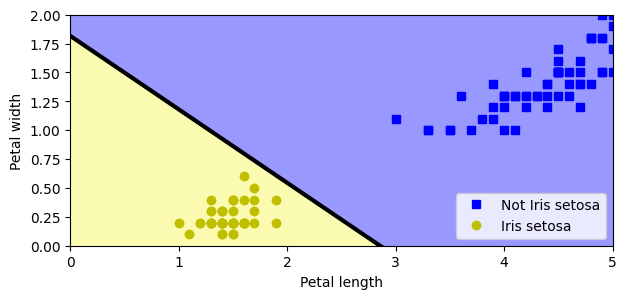

In [429]:
# extra code – plots the decision boundary of a Perceptron on the iris dataset

# When the Perceptron finds a decision boundary that properly separates the classes, it stops learning. This means that the decision boundary is often quite close to one class:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

You may have noticed that the perceptron learning algorithm strongly resembles stochastic gradient descent (introduced in Chapter 4). In fact, Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

In their 1969 monograph Perceptrons, Marvin Minsky and Seymour Papert highlighted a number of serious weaknesses of perceptrons—in particular, the fact that they are incapable of solving some trivial problems (e.g., the exclusive OR (XOR) classification problem; see the left side of Figure 10-6). This is true of any other linear classification model (such as logistic regression classifiers), but researchers had expected much more from perceptrons, and some were so disappointed that they dropped neural networks altogether in favor of higher-level problems such as logic, problem solving, and search. The lack of practical applications also didn’t help.

It turns out that some of the limitations of perceptrons can be eliminated by stacking multiple perceptrons. The resulting ANN is called a multilayer perceptron (MLP). An MLP can solve the XOR problem, as you can verify by computing the output of the MLP represented on the right side of Figure 10-6: with inputs (0, 0) or (1, 1), the network outputs 0, and with inputs (0, 1) or (1, 0) it outputs 1. Try verifying that this network indeed solves the XOR problem!

Figure 10-6. XOR classification problem and an MLP that solves it
![XOR_classification_problem](../images/XOR_classification_problem.png)


NOTE
Contrary to logistic regression classifiers, perceptrons do not output a class probability. This is one reason to prefer logistic regression over perceptrons. Moreover, perceptrons do not use any regularization by default, and training stops as soon as there are no more prediction errors on the training set, so the model typically does not generalize as well as logistic regression or a linear SVM classifier. However, perceptrons may train a bit faster.

# THE MULTILAYER PERCEPTRON AND BACKPROPAGATION
An MLP is composed of one input layer, one or more layers of TLUs called hidden layers, and one final layer of TLUs called the output layer (see Figure 10-7). The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers.

Figure 10-7. Architecture of a multilayer perceptron with two inputs, one hidden layer of four neurons, and three output neurons
![perceptron_with_hidden_layer](../images/perceptron_with_hidden_layer.png)


NOTE
The signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a feedforward neural network (FNN).

When an ANN contains a deep stack of hidden layers, it is called a deep neural network (DNN). The field of deep learning studies DNNs, and more generally it is interested in models containing deep stacks of computations. Even so, many people talk about deep learning whenever neural networks are involved (even shallow ones).

For many years researchers struggled to find a way to train MLPs, without success. In the early 1960s several researchers discussed the possibility of using gradient descent to train neural networks, but as we saw in Chapter 4, this requires computing the gradients of the model’s error with regard to the model parameters; it wasn’t clear at the time how to do this efficiently with such a complex model containing so many parameters, especially with the computers they had back then.

Then, in 1970, a researcher named Seppo Linnainmaa introduced in his master’s thesis a technique to compute all the gradients automatically and efficiently. This algorithm is now called reverse-mode automatic differentiation (or reverse-mode autodiff for short). In just two passes through the network (one forward, one backward), it is able to compute the gradients of the neural network’s error with regard to every single model parameter. In other words, it can find out how each connection weight and each bias should be tweaked in order to reduce the neural network’s error. These gradients can then be used to perform a gradient descent step. If you repeat this process of computing the gradients automatically and taking a gradient descent step, the neural network’s error will gradually drop until it eventually reaches a minimum. This combination of reverse-mode autodiff and gradient descent is now called backpropagation (or backprop for short).

NOTE
There are various autodiff techniques, with different pros and cons. Reverse-mode autodiff is well suited when the function to differentiate has many variables (e.g., connection weights and biases) and few outputs (e.g., one loss). If you want to learn more about autodiff, check out Appendix B.

Backpropagation can actually be applied to all sorts of computational graphs, not just neural networks: indeed, Linnainmaa’s master’s thesis was not about neural nets, it was more general. It was several more years before backprop started to be used to train neural networks, but it still wasn’t mainstream. Then, in 1985, David Rumelhart, Geoffrey Hinton, and Ronald Williams published a groundbreaking paper analyzing how backpropagation allowed neural networks to learn useful internal representations. Their results were so impressive that backpropagation was quickly popularized in the field. Today, it is by far the most popular training technique for neural networks.

Let’s run through how backpropagation works again in a bit more detail:
- It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.

- Each mini-batch enters the network through the input layer. The algorithm then computes the output of all the neurons in the first hidden layer, for every instance in the mini-batch. The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.

- Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).

- Then it computes how much each output bias and each connection to the output layer contributed to the error. This is done analytically by applying the chain rule (perhaps the most fundamental rule in calculus), which makes this step fast and precise.

- The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until it reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights and biases in the network by propagating the error gradient backward through the network (hence the name of the algorithm).

- Finally, the algorithm performs a gradient descent step to tweak all the connection weights in the network, using the error gradients it just computed.

WARNING
It is important to initialize all the hidden layers’ connection weights randomly, or else training will fail. For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won’t be too smart. If instead you randomly initialize the weights, you break the symmetry and allow backpropagation to train a diverse team of neurons.

In short, backpropagation makes predictions for a mini-batch (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each parameter (reverse pass), and finally tweaks the connection weights and biases to reduce the error (gradient descent step).

In order for backprop to work properly, Rumelhart and his colleagues made a key change to the MLP’s architecture: they replaced the step function with the logistic function, $\sigma(z) = \frac{1}{1 + \exp(-z)}$, also called the sigmoid function. This was essential because the step function contains only flat segments, so there is no gradient to work with (gradient descent cannot move on a flat surface), while the sigmoid function has a well-defined nonzero derivative everywhere, allowing gradient descent to make some progress at every step. In fact, the backpropagation algorithm works well with many other activation functions, not just the sigmoid function. Here are two other popular choices:

**The hyperbolic tangent function: $\tanh(z) = 2\sigma(2z) - 1$**
Just like the sigmoid function, this activation function is S-shaped, continuous, and differentiable, but its output value ranges from –1 to 1 (instead of 0 to 1 in the case of the sigmoid function). That range tends to make each layer’s output more or less centered around 0 at the beginning of training, which often helps speed up convergence.

**The rectified linear unit function: $\text{ReLU}(z) = \max(0, z)$**
The ReLU function is continuous but unfortunately not differentiable at $z = 0$ (the slope changes abruptly, which can make gradient descent bounce around), and its derivative is 0 for $z < 0$. In practice, however, it works very well and has the advantage of being fast to compute, so it has become the default. Importantly, the fact that it does not have a maximum output value helps reduce some issues during gradient descent (we will come back to this in Chapter 11).

These popular activation functions and their derivatives are represented in Figure 10-8. But wait! Why do we need activation functions in the first place? Well, if you chain several linear transformations, all you get is a linear transformation. For example, if $f(x) = 2x + 3$ and $g(x) = 5x - 1$, then chaining these two linear functions gives you another linear function: $f(g(x)) = 2(5x - 1) + 3 = 10x + 1$. So if you don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and you can’t solve very complex problems with that. Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.


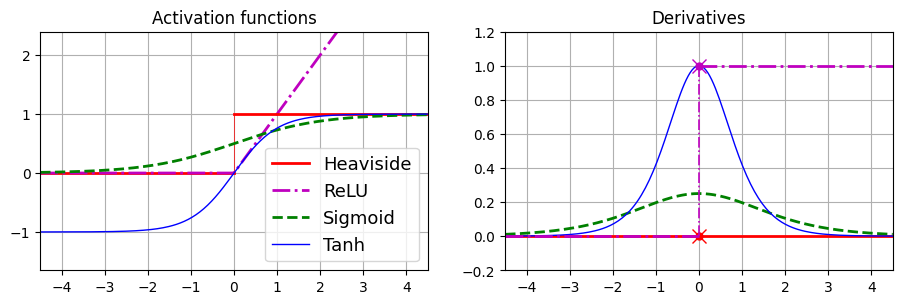

In [430]:
# extra code – this cell generates and saves Figure 10–8

from scipy.special import expit as sigmoid


def relu(z):
    return np.maximum(0, z)


def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)


max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.show()

# Figure 10-8. Activation functions (left) and their derivatives (right)

OK! You know where neural nets came from, what their architecture is, and how to compute their outputs. You’ve also learned about the backpropagation algorithm. But what exactly can you do with neural nets?

# REGRESSION MLPs
First, MLPs can be used for regression tasks. If you want to predict a single value (e.g., the price of a house, given many of its features), then you just need a single output neuron: its output is the predicted value. For multivariate regression (i.e., to predict multiple values at once), you need one output neuron per output dimension. For example, to locate the center of an object in an image, you need to predict 2D coordinates, so you need two output neurons. If you also want to place a bounding box around the object, then you need two more numbers: the width and the height of the object. So, you end up with four output neurons.

Scikit-Learn includes an MLPRegressor class, so let’s use it to build an MLP with three hidden layers composed of 50 neurons each, and train it on the California housing dataset. For simplicity, we will use Scikit-Learn’s fetch_california_housing() function to load the data. This dataset is simpler than the one we used in Chapter 2, since it contains only numerical features (there is no ocean_proximity feature), and there are no missing values. The following code starts by fetching and splitting the dataset, then it creates a pipeline to standardize the input features before sending them to the MLPRegressor. This is very important for neural networks because they are trained using gradient descent, and as we saw in Chapter 4, gradient descent does not converge very well when the features have very different scales. Finally, the code trains the model and evaluates its validation error. The model uses the ReLU activation function in the hidden layers, and it uses a variant of gradient descent called Adam (see Chapter 11) to minimize the mean squared error, with a little bit of $\ell_2$ regularization (which you can control via the alpha hyperparameter):

In [431]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)  # about 0.505

In [432]:
rmse

0.5053326657968648

We get a validation RMSE of about 0.505, which is comparable to what you would get with a random forest classifier. Not too bad for a first try!

Note that this MLP does not use any activation function for the output layer, so it’s free to output any value it wants. This is generally fine, but if you want to guarantee that the output will always be positive, then you should use the ReLU activation function in the output layer, or the softplus activation function, which is a smooth variant of ReLU: $softplus(z) = log(1 + exp(z))$. Softplus is close to 0 when $z$ is negative, and close to $z$ when $z$ is positive. Finally, if you want to guarantee that the predictions will always fall within a given range of values, then you should use the sigmoid function or the hyperbolic tangent, and scale the targets to the appropriate range: 0 to 1 for sigmoid and –1 to 1 for tanh. Sadly, the MLPRegressor class does not support activation functions in the output layer.

WARNING
Building and training a standard MLP with Scikit-Learn in just a few lines of code is very convenient, but the neural net features are limited. This is why we will switch to Keras in the second part of this chapter.

The MLPRegressor class uses the mean squared error, which is usually what you want for regression, but if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead. Alternatively, you may want to use the Huber loss, which is a combination of both. It is quadratic when the error is smaller than a threshold δ (typically 1) but linear when the error is larger than δ. The linear part makes it less sensitive to outliers than the mean squared error, and the quadratic part allows it to converge faster and be more precise than the mean absolute error. However, MLPRegressor only supports the MSE.

Table 10-1 summarizes the typical architecture of a regression MLP.

Table 10-1. Typical architecture of a regression MLP

| Hyperparameter               | Typical value                                             |
|------------------------------|-----------------------------------------------------------|
| Hidden layers                | Depends on the problem, but typically 1 to 5              |
| Neurons per hidden layer     | Depends on the problem, but typically 10 to 100           |
| Output neurons               | 1 per dimension                                           |
| Hidden activation            | ReLU                                                      |
| Output activation            | None, or ReLU/softplus (if positive outputs) or sigmoid/tanh (if bounded outputs) |
| Loss function                | MSE or Huber if outliers                                  |




# CLASSIFICATION MLPs
MLPs can also be used for classification tasks. For a binary classification problem, you just need a single output neuron using the sigmoid activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. The estimated probability of the negative class is equal to one minus that number.

MLPs can also easily handle multilabel binary classification tasks (see Chapter 3). For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. In this case, you would need two output neurons, both using the sigmoid activation function: the first would output the probability that the email is spam, and the second would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. Note that the output probabilities do not necessarily add up to 1. This lets the model output any combination of labels: you can have nonurgent ham, urgent ham, nonurgent spam, and perhaps even urgent spam (although that would probably be an error).

If each instance can belong only to a single class, out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer (see Figure 10-9). The softmax function (introduced in Chapter 4) will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1, since the classes are exclusive. As you saw in Chapter 3, this is called multiclass classification.

Regarding the loss function, since we are predicting probability distributions, the cross-entropy loss (or x-entropy or log loss for short, see Chapter 4) is generally a good choice.

Figure 10-9. A modern MLP (including ReLU and softmax) for classification
![modern_MLP](../images/modern_MLP.png)


Scikit-Learn has an MLPClassifier class in the sklearn.neural_network package. It is almost identical to the MLPRegressor class, except that it minimizes the cross entropy rather than the MSE. Give it a try now, for example on the iris dataset. It’s almost a linear task, so a single layer with 5 to 10 neurons should suffice (make sure to scale the features).

Table 10-2 summarizes the typical architecture of a classification MLP.

| Hyperparameter | Binary classification | Multilabel binary classification | Multiclass classification |
| --- | --- |----------------------------------|---------------------------|
| # hidden layers | Typically 1 to 5 layers, depending on the task | same as bin clf                     | same as bin clf           |
| # output neurons | 1 | 1 per binary label               | 1 per class               |
| Output layer activation | Sigmoid | Sigmoid                          | Softmax                   |
| Loss function | X-entropy | X-entropy                        | X-entropy                 |

TIP
Before we go on, I recommend you go through exercise 1 at the end of this chapter. You will play with various neural network architectures and visualize their outputs using the TensorFlow playground. This will be very useful to better understand MLPs, including the effects of all the hyperparameters (number of layers and neurons, activation functions, and more).

In [433]:
# extra code – this was left as an exercise for the reader

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

# IMPLEMENTING MLPS WITH KERAS
Keras is TensorFlow’s high-level deep learning API: it allows you to build, train, evaluate, and execute all sorts of neural networks. The original Keras library was developed by François Chollet as part of a research project and was released as a standalone open source project in March 2015. It quickly gained popularity, owing to its ease of use, flexibility, and beautiful design.

NOTE
Keras used to support multiple backends, including TensorFlow, PlaidML, Theano, and Microsoft Cognitive Toolkit (CNTK) (the last two are sadly deprecated), but since version 2.4, Keras is TensorFlow-only. Similarly, TensorFlow used to include multiple high-level APIs, but Keras was officially chosen as its preferred high-level API when TensorFlow 2 came out. Installing TensorFlow will automatically install Keras as well, and Keras will not work without TensorFlow installed. In short, Keras and TensorFlow fell in love and got married. Other popular deep learning libraries include PyTorch by Facebook and JAX by Google.

Now let’s use Keras! We will start by building an MLP for image classification.

NOTE
Colab runtimes come with recent versions of TensorFlow and Keras preinstalled. However, if you want to install them on your own machine, please see the installation instructions at https://homl.info/install.

# BUILDING AN IMAGE CLASSIFIER USING THE SEQUENTIAL API
First, we need to load a dataset. We will use Fashion MNIST, which is a drop-in replacement of MNIST (introduced in Chapter 3). It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST. For example, a simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST.

# USING KERAS TO LOAD THE DATASET
Keras provides some utility functions to fetch and load common datasets, including MNIST, Fashion MNIST, and a few more. Let’s load Fashion MNIST. It’s already shuffled and split into a training set (60,000 images) and a test set (10,000 images), but we’ll hold out the last 5,000 images from the training set for validation:

In [434]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

TIP
TensorFlow is usually imported as tf, and the Keras API is available via tf.keras.

When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one important difference is that every image is represented as a 28 × 28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0). Let’s take a look at the shape and data type of the training set:

In [435]:
X_train.shape

(55000, 28, 28)

In [436]:
X_train.dtype

dtype('uint8')

For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):

In [437]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. Easy. For Fashion MNIST, however, we need the list of class names to know what we are dealing with:

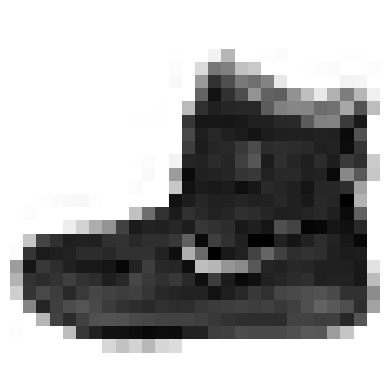

In [438]:
# extra code

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [439]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [440]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

For example, the first image in the training set represents an ankle boot:

In [441]:
class_names[y_train[0]]

'Ankle boot'

Figure 10-10 shows some samples from the Fashion MNIST dataset.

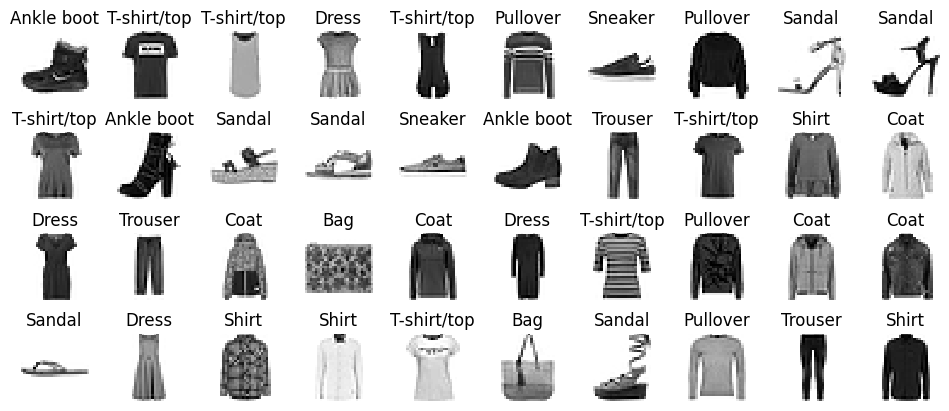

In [442]:
# extra code – this cell generates and saves Figure 10–10

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

# Figure 10-10. Samples from Fashion MNIST


# CREATING THE MODEL USING THE SEQUENTIAL API
Now let’s build the neural network! Here is a classification MLP with two hidden layers:

In [443]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Let’s go through this code line by line:

- First, set TensorFlow’s random seed to make the results reproducible: the random weights of the hidden layers and the output layer will be the same every time you run the notebook. You could also choose to use the tf.keras.utils.set_random_seed() function, which conveniently sets the random seeds for TensorFlow, Python (random.seed()), and NumPy (np.random.seed()).

- The next line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the sequential API.

- Next, we build the first layer (an Input layer) and add it to the model. We specify the input shape, which doesn’t include the batch size, only the shape of the instances. Keras needs to know the shape of the inputs so it can determine the shape of the connection weight matrix of the first hidden layer.

- Then we add a Flatten layer. Its role is to convert each input image into a 1D array: for example, if it receives a batch of shape [32, 28, 28], it will reshape it to [32, 784]. In other words, if it receives input data X, it computes X.reshape(-1, 784). This layer doesn’t have any parameters; it’s just there to do some simple preprocessing.

- Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes Equation 10-2.

- Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function.

- Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function because the classes are exclusive.


TIP
Specifying activation="relu" is equivalent to specifying activation=tf.keras.activations.relu. Other activation functions are available in the tf.keras.activations package. We will use many of them in this book; see https://keras.io/api/layers/activations for the full list. We will also define our own custom activation functions in Chapter 12.

Instead of adding the layers one by one as we just did, it’s often more convenient to pass a list of layers when creating the Sequential model. You can also drop the Input layer and instead specify the input_shape in the first layer:

In [444]:
# extra code – clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [445]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

The model’s summary() method displays all the model’s layers, including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters (you will see some non-trainable parameters later in this chapter):

In [446]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Note that Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data. We will come back to this later.

Each layer in a model must have a unique name (e.g., "dense_2"). You can set the layer names explicitly using the constructor’s name argument, but generally it’s simpler to let Keras name the layers automatically, as we just did. Keras takes the layer’s class name and converts it to snake case (e.g., a layer from the MyCoolLayer class is named "my_cool_layer" by default). Keras also ensures that the name is globally unique, even across models, by appending an index if needed, as in "dense_2". But why does it bother making the names unique across models? Well, this makes it possible to merge models easily without getting name conflicts.

TIP
All global state managed by Keras is stored in a Keras session, which you can clear using tf.keras.backend.clear_session(). In particular, this resets the name counters.

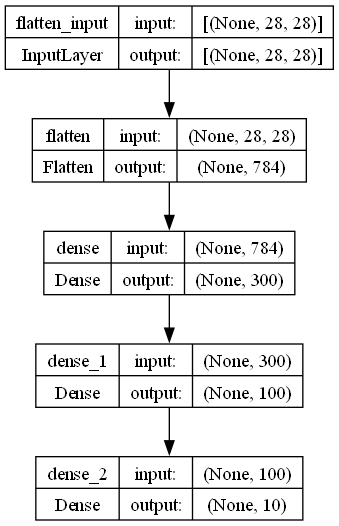

In [447]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "../images/my_fashion_mnist_model.png", show_shapes=True)

You can easily get a model’s list of layers using the layers attribute, or use the get_layer() method to access a layer by name:

In [448]:
model.layers

In [449]:
hidden1 = model.layers[1]

In [450]:
hidden1.name

'dense'

In [451]:
model.get_layer(hidden1.name) is hidden1

True

All the parameters of a layer can be accessed using its get_weights() and set_weights() methods. For a Dense layer, this includes both the connection weights and the bias terms:

In [452]:
weights, biases = hidden1.get_weights()
weights

array([[-3.3936806e-02, -2.8839409e-02,  1.3028614e-02, ...,
         2.2811055e-02, -7.4428767e-03, -1.1546724e-02],
       [-3.3730198e-02, -1.7526757e-02, -4.9442671e-02, ...,
         4.2776003e-02, -4.3494068e-02, -4.3797135e-02],
       [ 5.4615572e-02,  5.5824116e-02, -2.5603209e-02, ...,
        -1.6638640e-02,  1.1695065e-02,  4.4773325e-02],
       ...,
       [-3.4263093e-02,  3.2148086e-02, -2.7908988e-02, ...,
         7.0222706e-02, -7.0348382e-05, -3.8263902e-02],
       [ 5.6500718e-02, -2.5896750e-02, -6.0554519e-03, ...,
         2.8343014e-02, -6.6444188e-02, -2.3135625e-02],
       [-7.1085051e-02,  3.8902380e-02, -1.9356094e-02, ...,
        -3.2545786e-02, -1.0755345e-02, -3.6758952e-02]], dtype=float32)

In [453]:
weights.shape

(784, 300)

In [454]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [455]:
biases.shape

(300,)

Notice that the Dense layer initialized the connection weights randomly (which is needed to break symmetry, as discussed earlier), and the biases were initialized to zeros, which is fine. If you want to use a different initialization method, you can set kernel_initializer (kernel is another name for the matrix of connection weights) or bias_initializer when creating the layer. We’ll discuss initializers further in Chapter 11, and the full list is at https://keras.io/api/layers/initializers.

NOTE
The shape of the weight matrix depends on the number of inputs, which is why we specified the input_shape when creating the model. If you do not specify the input shape, it’s OK: Keras will simply wait until it knows the input shape before it actually builds the model parameters. This will happen either when you feed it some data (e.g., during training), or when you call its build() method. Until the model parameters are built, you will not be able to do certain things, such as display the model summary or save the model. So, if you know the input shape when creating the model, it is best to specify it.

# COMPILING THE MODEL
After a model is created, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:

In [456]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [457]:
# extra code – this cell is equivalent to the previous cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [458]:
# extra code – shows how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)
# Note: it's important to set num_classes when the number of classes is greater than the maximum class id in the sample.

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [459]:
# extra code – shows how to convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0], dtype=int64)

NOTE
Using loss="sparse_categorical_crossentropy" is the equivalent of using loss=tf.keras.losses.sparse_categorical_​cross⁠entropy. Similarly, using optimizer="sgd" is the equivalent of using optimizer=tf.keras.optimizers.SGD(), and using metrics=["accuracy"] is the equivalent of using metrics=​[tf.keras.metrics.sparse_categorical_accuracy] (when using this loss). We will use many other losses, optimizers, and metrics in this book; for the full lists, see https://keras.io/api/losses, https://keras.io/api/optimizers, and https://keras.io/api/metrics.

This code requires explanation. We use the "sparse_categorical_crossentropy" loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g., [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classification or multilabel binary classification, then we would use the "sigmoid" activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.

TIP
If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use the tf.keras.utils.to_categorical() function. To go the other way round, use the np.argmax() function with axis=1.

Regarding the optimizer, "sgd" means that we will train the model using stochastic gradient descent. In other words, Keras will perform the backpropagation algorithm described earlier (i.e., reverse-mode autodiff plus gradient descent). We will discuss more efficient optimizers in Chapter 11. They improve gradient descent, not autodiff.

NOTE
When using the SGD optimizer, it is important to tune the learning rate. So, you will generally want to use optimizer=tf.keras. ​opti⁠mizers.SGD(learning_rate=__???__) to set the learning rate, rather than optimizer="sgd", which defaults to a learning rate of 0.01.

Finally, since this is a classifier, it’s useful to measure its accuracy during training and evaluation, which is why we set metrics=["accuracy"].

# TRAINING AND EVALUATING THE MODEL
Now the model is ready to be trained. For this we simply need to call its fit() method:

In [460]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7179 - sparse_categorical_accuracy: 0.7650 - val_loss: 0.5077 - val_sparse_categorical_accuracy: 0.8278
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4897 - sparse_categorical_accuracy: 0.8314 - val_loss: 0.4634 - val_sparse_categorical_accuracy: 0.8348
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4438 - sparse_categorical_accuracy: 0.8450 - val_loss: 0.4259 - val_sparse_categorical_accuracy: 0.8536
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4188 - sparse_categorical_accuracy: 0.8541 - val_loss: 0.3968 - val_sparse_categorical_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3974 - sparse_categorical_accuracy: 0.8617 - val_loss: 0.3931 - val_sparse_categorical_accuracy: 0.8602
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3803 - spars

We pass it the input features (X_train) and the target classes (y_train), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). We also pass a validation set (this is optional). Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs. If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set, or there is a bug, such as a data mismatch between the training set and the validation set.

TIP
Shape errors are quite common, especially when getting started, so you should familiarize yourself with the error messages: try fitting a model with inputs and/or labels of the wrong shape, and see the errors you get. Similarly, try compiling the model with loss="categorical_crossentropy" instead of loss="sparse_​cat⁠egorical_crossentropy". Or you can remove the Flatten layer.

And that’s it! The neural network is trained. At each epoch during training, Keras displays the number of mini-batches processed so far on the left side of the progress bar. The batch size is 32 by default, and since the training set has 55,000 images, the model goes through 1,719 batches per epoch: 1,718 of size 32, and 1 of size 24. After the progress bar, you can see the mean training time per sample, and the loss and accuracy (or any other extra metrics you asked for) on both the training set and the validation set. Notice that the training loss went down, which is a good sign, and the validation accuracy reached 88.94% after 30 epochs. That’s slightly below the training accuracy, so there is a little bit of overfitting going on, but not a huge amount.

TIP
Instead of passing a validation set using the validation_data argument, you could set validation_split to the ratio of the training set that you want Keras to use for validation. For example, validation_split=0.1 tells Keras to use the last 10% of the data (before shuffling) for validation.

If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the class_weight argument when calling the fit() method, to give a larger weight to underrepresented classes and a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss. If you need per-instance weights, set the sample_weight argument. If both class_weight and sample_weight are provided, then Keras multiplies them. Per-instance weights could be useful, for example, if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former. You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the validation_data tuple.

The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you use this dictionary to create a Pandas DataFrame and call its plot() method, you get the learning curves shown in Figure 10-11:

In [461]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [462]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


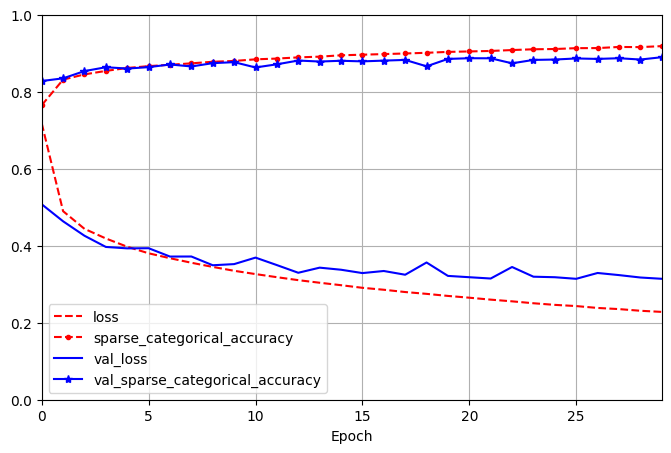

In [463]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

# Figure 10-11. Learning curves: the mean training loss and accuracy measured over each epoch, and the mean validation loss and accuracy measured at the end of each epoch

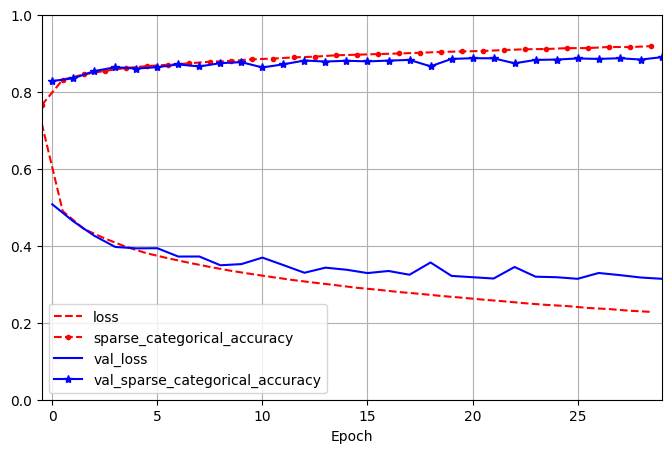

In [464]:
# extra code – shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

You can see that both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. This is good. The validation curves are relatively close to each other at first, but they get further apart over time, which shows that there’s a little bit of overfitting. In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training, but that’s not actually the case. The validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch, so the training curve should be shifted by half an epoch to the left. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.

The training set performance ends up beating the validation performance, as is generally the case when you train for long enough. You can tell that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training. This is as simple as calling the fit() method again, since Keras just continues training where it left off: you should be able to reach about 89.8% validation accuracy, while the training accuracy will continue to rise up to 100% (this is not always the case).

If you are not satisfied with the performance of your model, you should go back and tune the hyperparameters. The first one to check is the learning rate. If that doesn’t help, try another optimizer (and always retune the learning rate after changing any hyperparameter). If the performance is still not great, then try tuning model hyperparameters such as the number of layers, the number of neurons per layer, and the types of activation functions to use for each hidden layer. You can also try tuning other hyperparameters, such as the batch size (it can be set in the fit() method using the batch_size argument, which defaults to 32). We will get back to hyperparameter tuning at the end of this chapter. Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. You can easily do this using the evaluate() method (it also supports several other arguments, such as batch_size and sample_weight; please check the documentation for more details):

In [465]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3302 - sparse_categorical_accuracy: 0.8832


[0.3302258849143982, 0.8831999897956848]

As you saw in Chapter 2, it is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set (however, in this example, we did not do any hyperparameter tuning, so the lower accuracy is just bad luck). Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic.

# USING THE MODEL TO MAKE PREDICTIONS
Now let’s use the model’s predict() method to make predictions on new instances. Since we don’t have actual new instances, we’ll just use the first three instances of the test set:

In [466]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 39ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

For each instance the model estimates one probability per class, from class 0 to class 9. This is similar to the output of the predict_proba() method in Scikit-Learn classifiers. For example, for the first image it estimates that the probability of class 9 (ankle boot) is 96%, the probability of class 7 (sneaker) is 2%, the probability of class 5 (sandal) is 1%, and the probabilities of the other classes are negligible. In other words, it is highly confident that the first image is footwear, most likely ankle boots but possibly sneakers or sandals. If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the argmax() method to get the highest probability class index for each instance:

In [467]:
import numpy as np

y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [468]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Here, the classifier actually classified all three images correctly (these images are shown in Figure 10-12):

In [469]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

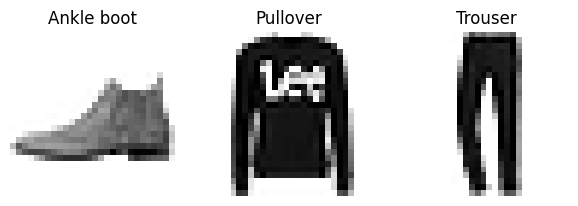

In [470]:
# extra code – this cell generates and saves Figure 10–12
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Figure 10-12. Correctly classified Fashion MNIST images

Now you know how to use the sequential API to build, train, and evaluate a classification MLP. But what about regression?

# BUILDING A REGRESSION MLP USING THE SEQUENTIAL API
Let’s switch back to the California housing problem and tackle it using the same MLP as earlier, with 3 hidden layers composed of 50 neurons each, but this time building it with Keras.

Using the sequential API to build, train, evaluate, and use a regression MLP is quite similar to what we did for classification. The main differences in the following code example are the fact that the output layer has a single neuron (since we only want to predict a single value) and it uses no activation function, the loss function is the mean squared error, the metric is the RMSE, and we’re using an Adam optimizer like Scikit-Learn’s MLPRegressor did. Moreover, in this example we don’t need a Flatten layer, and instead we’re using a Normalization layer as the first layer: it does the same thing as Scikit-Learn’s StandardScaler, but it must be fitted to the training data using its adapt() method before you call the model’s fit() method. (Keras has other preprocessing layers, which will be covered in Chapter 13). Let’s take a look:

In [471]:

# extra code – load and split the California housing dataset, like earlier
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [472]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8683 - root_mean_squared_error: 0.9318 - val_loss: 0.5063 - val_root_mean_squared_error: 0.7115
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3833 - root_mean_squared_error: 0.6191 - val_loss: 0.4868 - val_root_mean_squared_error: 0.6977
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3605 - root_mean_squared_error: 0.6004 - val_loss: 0.3983 - val_root_mean_squared_error: 0.6311
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3452 - root_mean_squared_error: 0.5875 - val_loss: 0.3463 - val_root_mean_squared_error: 0.5884
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3341 - root_mean_squared_error: 0.5780 - val_loss: 0.3769 - val_root_mean_squared_error: 0.6140
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3223 - root_mean_squared_error: 0.5677 - val_loss: 0.3028 - val_

In [473]:
rmse_test

0.5319495797157288

In [474]:
y_pred

array([[0.522797 ],
       [0.9739089],
       [4.8980255]], dtype=float32)

NOTE
The Normalization layer learns the feature means and standard deviations in the training data when you call the adapt() method. Yet when you display the model’s summary, these statistics are listed as non-trainable. This is because these parameters are not affected by gradient descent.

As you can see, the sequential API is quite clean and straightforward. However, although Sequential models are extremely common, it is sometimes useful to build neural networks with more complex topologies, or with multiple inputs or outputs. For this purpose, Keras offers the functional API.

# BUILDING COMPLEX MODELS USING THE FUNCTIONAL API
One example of a nonsequential neural network is a Wide & Deep neural network. This neural network architecture was introduced in a 2016 paper by Heng-Tze Cheng et al. It connects all or part of the inputs directly to the output layer, as shown in Figure 10-13. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

Figure 10-13. A Wide & Deep neural network
![wide_and_deep_NN](../images/wide_and_deep_NN.png)


Let’s build such a neural network to tackle the California housing problem. 

In [475]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [476]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [477]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization (Normalizati  (None, 8)                    17        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['normalization[0][0]']       
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']           

In [478]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2079 - root_mean_squared_error: 1.0991 - val_loss: 1.7577 - val_root_mean_squared_error: 1.3258
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4538 - root_mean_squared_error: 0.6736 - val_loss: 1.1409 - val_root_mean_squared_error: 1.0681
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4033 - root_mean_squared_error: 0.6351 - val_loss: 0.4317 - val_root_mean_squared_error: 0.6571
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3708 - root_mean_squared_error: 0.6089 - val_loss: 0.6621 - val_root_mean_squared_error: 0.8137
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3633 - root_mean_squared_error: 0.6028 - val_loss: 1.9726 - val_root_mean_squared_error: 1.4045
Epoch 6/20
363/363 [==============================] - 0s 992us/step - loss: 0.3669 - root_mean_squared_error: 0.6057 - val_loss: 4.0285 - va

At a high level, the first five lines create all the layers we need to build the model, the next six lines use these layers just like functions to go from the input to the output, and the last line creates a Keras Model object by pointing to the input and the output. Let’s go through this code in more detail:

- First, we create five layers: a Normalization layer to standardize the inputs, two Dense layers with 30 neurons each, using the ReLU activation function, a Concatenate layer, and one more Dense layer with a single neuron for the output layer, without any activation function.

- Next, we create an Input object (the variable name input_ is used to avoid overshadowing Python’s built-in input() function). This is a specification of the kind of input the model will get, including its shape and optionally its dtype, which defaults to 32-bit floats. A model may actually have multiple inputs, as you will see shortly.

- Then we use the Normalization layer just like a function, passing it the Input object. This is why this is called the functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet, as the Input object is just a data specification. In other words, it’s a symbolic input. The output of this call is also symbolic: normalized doesn’t store any actual data, it’s just used to construct the model.

- In the same way, we then pass normalized to hidden_layer1, which outputs hidden1, and we pass hidden1 to hidden_layer2, which outputs hidden2.

- So far we’ve connected the layers sequentially, but then we use the concat_layer to concatenate the input and the second hidden layer’s output. Again, no actual data is concatenated yet: it’s all symbolic, to build the model.

- Then we pass concat to the output_layer, which gives us the final output.

- Lastly, we create a Keras Model, specifying which inputs and outputs to use.

Once you have built this Keras model, everything is exactly like earlier, so there’s no need to repeat it here: you compile the model, adapt the Normalization layer, fit the model, evaluate it, and use it to make predictions.

But what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path, as illustrated in Figure 10-14? In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7). We can do this as follows:

In [479]:
tf.random.set_seed(42)  # extra code

In [480]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

Figure 10-14. Handling multiple inputs
![handling_multiple_inputs](../images/handling_multiple_inputs.png)

There are a few things to note in this example, compared to the previous one:

- Each Dense layer is created and called on the same line. This is a common practice, as it makes the code more concise without losing clarity. However, we can’t do this with the Normalization layer since we need a reference to the layer to be able to call its adapt() method before fitting the model.

- We used tf.keras.layers.concatenate(), which creates a Concatenate layer and calls it with the given inputs.

- We specified inputs=[input_wide, input_deep] when creating the model, since there are two inputs.

Now we can compile the model as usual, but when we call the fit() method, instead of passing a single input matrix X_train, we must pass a pair of matrices (X_train_wide, X_train_deep), one per input. The same is true for X_valid, and also for X_test and X_new when you call evaluate() or predict():

In [481]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2531 - root_mean_squared_error: 1.1194 - val_loss: 0.5290 - val_root_mean_squared_error: 0.7273
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4645 - root_mean_squared_error: 0.6815 - val_loss: 0.6371 - val_root_mean_squared_error: 0.7982
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4104 - root_mean_squared_error: 0.6406 - val_loss: 0.3786 - val_root_mean_squared_error: 0.6153
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3926 - root_mean_squared_error: 0.6265 - val_loss: 0.3947 - val_root_mean_squared_error: 0.6283
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3796 - root_mean_squared_error: 0.6162 - val_loss: 0.4521 - val_root_mean_squared_error: 0.6723
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3692 - root_mean_squared_error: 0.6076 - val_loss: 1.1463 - val_

TIP
Instead of passing a tuple (X_train_wide, X_train_deep), you can pass a dictionary {"input_wide": X_train_wide, "input_deep": X_train_deep}, if you set name="input_wide" and name="input_deep" when creating the inputs. This is highly recommended when there are many inputs, to clarify the code and avoid getting the order wrong.

There are also many use cases in which you may want to have multiple outputs:

- The task may demand it. For instance, you may want to locate and classify the main object in a picture. This is both a regression tasks and a classification task.

- Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For example, you could perform multitask classification on pictures of faces, using one output to classify the person’s facial expression (smiling, surprised, etc.) and another output to identify whether they are wearing glasses or not.

- Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add an auxiliary output in a neural network architecture (see Figure 10-15) to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

Figure 10-15. Handling multiple outputs, in this example to add an auxiliary output for regularization
![auxiliary_output_for_regularization](../images/auxiliary_output_for_regularization.png)


Adding an extra output is quite easy: we just connect it to the appropriate layer and add it to the model’s list of outputs. For example, the following code builds the network represented in Figure 10-15:

In [482]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [483]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

Each output will need its own loss function. Therefore, when we compile the model, we should pass a list of losses. If we pass a single loss, Keras will assume that the same loss must be used for all outputs. By default, Keras will compute all the losses and simply add them up to get the final loss used for training. Since we care much more about the main output than about the auxiliary output (as it is just used for regularization), we want to give the main output’s loss a much greater weight. Luckily, it is possible to set all the loss weights when compiling the model:

In [484]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

TIP
Instead of passing a tuple loss=("mse", "mse"), you can pass a dictionary loss={"output": "mse", "aux_output": "mse"}, assuming you created the output layers with name="output" and name="aux_output". Just like for the inputs, this clarifies the code and avoids errors when there are several outputs. You can also pass a dictionary for loss_weights.

Now when we train the model, we need to provide labels for each output. In this example, the main output and the auxiliary output should try to predict the same thing, so they should use the same labels. So instead of passing y_train, we need to pass (y_train, y_train), or a dictionary {"output": y_train, "aux_output": y_train} if the outputs were named "output" and "aux_output". The same goes for y_valid and y_test:

In [485]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5494 - dense_2_loss: 1.4864 - dense_3_loss: 2.1163 - dense_2_root_mean_squared_error: 1.2192 - dense_3_root_mean_squared_error: 1.4548 - val_loss: 1.3958 - val_dense_2_loss: 1.3755 - val_dense_3_loss: 1.5778 - val_dense_2_root_mean_squared_error: 1.1728 - val_dense_3_root_mean_squared_error: 1.2561
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5579 - dense_2_loss: 0.5339 - dense_3_loss: 0.7740 - dense_2_root_mean_squared_error: 0.7307 - dense_3_root_mean_squared_error: 0.8798 - val_loss: 0.7898 - val_dense_2_loss: 0.8007 - val_dense_3_loss: 0.6921 - val_dense_2_root_mean_squared_error: 0.8948 - val_dense_3_root_mean_squared_error: 0.8319
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4656 - dense_2_loss: 0.4502 - dense_3_loss: 0.6044 - dense_2_root_mean_squared_error: 0.6710 - dense_3_root_mean_squared_error: 0.7774 - val_loss: 0.5234 - val_dense_2_loss

When we evaluate the model, Keras returns the weighted sum of the losses, as well as all the individual losses and metrics:

In [486]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 780us/step - loss: 0.3390 - dense_2_loss: 0.3335 - dense_3_loss: 0.3888 - dense_2_root_mean_squared_error: 0.5775 - dense_3_root_mean_squared_error: 0.6236


TIP
If you set return_dict=True, then evaluate() will return a dictionary instead of a big tuple.

Similarly, the predict() method will return predictions for each output:

In [487]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 52ms/step


The predict() method returns a tuple, and it does not have a return_dict argument to get a dictionary instead. However, you can create one using model.output_names:

In [488]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 [==============================] - 0s 14ms/step


As you can see, you can build all sorts of architectures with the functional API. Next, we’ll look at one last way you can build Keras models.

# SUBCLASSING API TO BUILD DYNAMIC MODELS
Both the sequential API and the functional API are declarative: you start by declaring which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training or inference. This has many advantages: the model can easily be saved, cloned, and shared; its structure can be displayed and analyzed; the framework can infer shapes and check types, so errors can be caught early (i.e., before any data ever goes through the model). It’s also fairly straightforward to debug, since the whole model is a static graph of layers. But the flip side is just that: it’s static. Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if you prefer a more imperative programming style, the subclassing API is for you.

With this approach, you subclass the Model class, create the layers you need in the constructor, and use them to perform the computations you want in the call() method. For example, creating an instance of the following WideAndDeepModel class gives us an equivalent model to the one we just built with the functional API:

In [489]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output


model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [490]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.7023 - output_1_loss: 1.6451 - output_2_loss: 2.2173 - output_1_root_mean_squared_error: 1.2826 - output_2_root_mean_squared_error: 1.4890 - val_loss: 1.1584 - val_output_1_loss: 0.6006 - val_output_2_loss: 6.1788 - val_output_1_root_mean_squared_error: 0.7750 - val_output_2_root_mean_squared_error: 2.4857
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5279 - output_1_loss: 0.4946 - output_2_loss: 0.8273 - output_1_root_mean_squared_error: 0.7033 - output_2_root_mean_squared_error: 0.9095 - val_loss: 0.7171 - val_output_1_loss: 0.5016 - val_output_2_loss: 2.6564 - val_output_1_root_mean_squared_error: 0.7083 - val_output_2_root_mean_squared_error: 1.6298
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4527 - output_1_loss: 0.4321 - output_2_loss: 0.6382 - output_1_root_mean_squared_error: 0.6574 - output_2_root_mean_squared_error: 0.7988 - val_loss: 0.443

This example looks like the previous one, except we separate the creation of the layers in the constructor from their usage in the call() method. And we don’t need to create the Input objects: we can use the input argument to the call() method.

Now that we have a model instance, we can compile it, adapt its normalization layers (e.g., using model.norm_layer_wide.adapt(...) and model.norm_layer_deep.adapt(...)), fit it, evaluate it, and use it to make predictions, exactly like we did with the functional API.

The big difference with this API is that you can include pretty much anything you want in the call() method: for loops, if statements, low-level TensorFlow operations—your imagination is the limit (see Chapter 12)! This makes it a great API when experimenting with new ideas, especially for researchers. However, this extra flexibility does come at a cost: your model’s architecture is hidden within the call() method, so Keras cannot easily inspect it; the model cannot be cloned using tf.keras.models.clone_model(); and when you call the summary() method, you only get a list of layers, without any information on how they are connected to each other. Moreover, Keras cannot check types and shapes ahead of time, and it is easier to make mistakes. So unless you really need that extra flexibility, you should probably stick to the sequential API or the functional API.

TIP
Keras models can be used just like regular layers, so you can easily combine them to build complex architectures.

Now that you know how to build and train neural nets using Keras, you will want to save them!

# SAVING AND RESTORING A MODEL


In [491]:
# extra code – delete the directory, in case it already exists

import shutil
path_to_keras_model = "saved_models/my_keras_model"
shutil.rmtree(path_to_keras_model, ignore_errors=True)

In [492]:
model.save(path_to_keras_model, save_format="tf")

INFO:tensorflow:Assets written to: saved_models/my_keras_model\assets


INFO:tensorflow:Assets written to: saved_models/my_keras_model\assets


In [493]:
from pathlib import Path
# extra code – show the contents of the my_keras_model/ directory
for path in sorted(Path(path_to_keras_model).glob("**/*")):
    print(path)

saved_models\my_keras_model\assets
saved_models\my_keras_model\fingerprint.pb
saved_models\my_keras_model\keras_metadata.pb
saved_models\my_keras_model\saved_model.pb
saved_models\my_keras_model\variables
saved_models\my_keras_model\variables\variables.data-00000-of-00001
saved_models\my_keras_model\variables\variables.index


When you set save_format="tf", Keras saves the model using TensorFlow’s SavedModel format: this is a directory (with the given name) containing several files and subdirectories. In particular, the saved_model.pb file contains the model’s architecture and logic in the form of a serialized computation graph, so you don’t need to deploy the model’s source code in order to use it in production; the SavedModel is sufficient (you will see how this works in Chapter 12). The keras_metadata.pb file contains extra information needed by Keras. The variables subdirectory contains all the parameter values (including the connection weights, the biases, the normalization statistics, and the optimizer’s parameters), possibly split across multiple files if the model is very large. Lastly, the assets directory may contain extra files, such as data samples, feature names, class names, and so on. By default, the assets directory is empty. Since the optimizer is also saved, including its hyperparameters and any state it may have, after loading the model you can continue training if you want.

NOTE
If you set save_format="h5" or use a filename that ends with .h5, .hdf5, or .keras, then Keras will save the model to a single file using a Keras-specific format based on the HDF5 format. However, most TensorFlow deployment tools require the SavedModel format instead.

You will typically have a script that trains a model and saves it, and one or more scripts (or web services) that load the model and use it to evaluate it or to make predictions. Loading the model is just as easy as saving it:

In [494]:
model = tf.keras.models.load_model(path_to_keras_model)
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 53ms/step


You can also use save_weights() and load_weights() to save and load only the parameter values. This includes the connection weights, biases, preprocessing stats, optimizer state, etc. The parameter values are saved in one or more files such as my_weights.data-00004-of-00052, plus an index file like my_weights.index.

Saving just the weights is faster and uses less disk space than saving the whole model, so it’s perfect to save quick checkpoints during training. If you’re training a big model, and it takes hours or days, then you must save checkpoints regularly in case the computer crashes. But how can you tell the fit() method to save checkpoints? Use callbacks.

In [495]:
path_to_saved_weights = "saved_models/my_weights"
model.save_weights(path_to_saved_weights)

In [496]:
model.load_weights(path_to_saved_weights)

In [497]:
# extra code – show the list of my_weights.* files
for path in sorted(Path().glob(f"{path_to_saved_weights}.*")):
    print(path)

saved_models\my_weights.data-00000-of-00001
saved_models\my_weights.index


# USING CALLBACKS
The fit() method accepts a callbacks argument that lets you specify a list of objects that Keras will call before and after training, before and after each epoch, and even before and after processing each batch. For example, the ModelCheckpoint callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch:

In [498]:
path_to_checkpoints = "saved_models/my_checkpoints"
shutil.rmtree(path_to_checkpoints, ignore_errors=True)  # extra code

In [499]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(path_to_checkpoints,                                        save_weights_only=True)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 2ms/step - loss: 0.3694 - output_1_loss: 0.3590 - output_2_loss: 0.4632 - output_1_root_mean_squared_error: 0.5991 - output_2_root_mean_squared_error: 0.6806 - val_loss: 0.5405 - val_output_1_loss: 0.5322 - val_output_2_loss: 0.6153 - val_output_1_root_mean_squared_error: 0.7295 - val_output_2_root_mean_squared_error: 0.7844
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3661 - output_1_loss: 0.3563 - output_2_loss: 0.4542 - output_1_root_mean_squared_error: 0.5969 - output_2_root_mean_squared_error: 0.6740 - val_loss: 1.0896 - val_output_1_loss: 1.0041 - val_output_2_loss: 1.8598 - val_output_1_root_mean_squared_error: 1.0020 - val_output_2_root_mean_squared_error: 1.3638
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3642 - output_1_loss: 0.3547 - output_2_loss: 0.4497 - output_1_root_mean_squared_error: 0.5956 - output_2_root_mean_squared_error: 0.6706 - val_loss: 0.881

Moreover, if you use a validation set during training, you can set save_​best_only=True when creating the ModelCheckpoint. In this case, it will only save your model when its performance on the validation set is the best so far. This way, you do not need to worry about training for too long and overfitting the training set: simply restore the last saved model after training, and this will be the best model on the validation set. This is one way to implement early stopping (introduced in Chapter 4), but it won’t actually stop training.

Another way is to use the EarlyStopping callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and if you set restore_best_weights=True it will roll back to the best model at the end of training. You can combine both callbacks to save checkpoints of your model in case your computer crashes, and interrupt training early when there is no more progress, to avoid wasting time and resources and to reduce overfitting:

In [500]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3429 - output_1_loss: 0.3354 - output_2_loss: 0.4109 - output_1_root_mean_squared_error: 0.5791 - output_2_root_mean_squared_error: 0.6410 - val_loss: 0.6776 - val_output_1_loss: 0.6766 - val_output_2_loss: 0.6859 - val_output_1_root_mean_squared_error: 0.8226 - val_output_2_root_mean_squared_error: 0.8282
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3492 - output_1_loss: 0.3427 - output_2_loss: 0.4077 - output_1_root_mean_squared_error: 0.5854 - output_2_root_mean_squared_error: 0.6385 - val_loss: 0.7605 - val_output_1_loss: 0.7129 - val_output_2_loss: 1.1887 - val_output_1_root_mean_squared_error: 0.8443 - val_output_2_root_mean_squared_error: 1.0903
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3367 - output_1_loss: 0.3298 - output_2_loss: 0.3985 - output_1_root_mean_squared_error: 0.5743 - output_2_root_mean_squared_error: 0.6313 - val_loss: 0.

The number of epochs can be set to a large value since training will stop automatically when there is no more progress (just make sure the learning rate is not too small, or else it might keep making slow progress until the end). The EarlyStopping callback will store the weights of the best model in RAM, and it will restore them for you at the end of training.

TIP
Many other callbacks are available in the tf.keras.callbacks package.

If you need extra control, you can easily write your own custom callbacks. For example, the following custom callback will display the ratio between the validation loss and the training loss during training (e.g., to detect overfitting):

In [501]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [502]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=1.39
Epoch=1, val/train=1.03
Epoch=2, val/train=1.59
Epoch=3, val/train=1.45
Epoch=4, val/train=3.02
Epoch=5, val/train=1.42
Epoch=6, val/train=3.51
Epoch=7, val/train=1.77
Epoch=8, val/train=2.60
Epoch=9, val/train=0.95


As you might expect, you can implement on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(), on_batch_begin(), and on_batch_end(). Callbacks can also be used during evaluation and predictions, should you ever need them (e.g., for debugging). For evaluation, you should implement on_test_begin(), on_test_end(), on_test_batch_begin(), or on_test_batch_end(), which are called by evaluate(). For prediction, you should implement on_predict_begin(), on_predict_end(), on_predict_batch_begin(), or on_predict_batch_end(), which are called by predict().

Now let’s take a look at one more tool you should definitely have in your toolbox when using Keras: TensorBoard.

# USING TENSORBOARD FOR VISUALIZATION
TensorBoard is a great interactive visualization tool that you can use to view the learning curves during training, compare curves and metrics between multiple runs, visualize the computation graph, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and automatically clustered for you, profile your network (i.e., measure its speed to identify bottlenecks), and more!

TensorBoard is installed automatically when you install TensorFlow. However, you will need a TensorBoard plug-in to visualize profiling data. If you followed the installation instructions at https://homl.info/install to run everything locally, then you already have the plug-in installed, but if you are using Colab, then you must run the following command:

To use TensorBoard, you must modify your program so that it outputs the data you want to visualize to special binary logfiles called event files. Each binary data record is called a summary. The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations: this allows you to visualize live data (with a short delay), such as the learning curves during training. In general, you want to point the TensorBoard server to a root log directory and configure your program so that it writes to a different subdirectory every time it runs. This way, the same TensorBoard server instance will allow you to visualize and compare data from multiple runs of your program, without getting everything mixed up.

Let’s name the root log directory my_logs, and let’s define a little function that generates the path of the log subdirectory based on the current date and time, so that it’s different at every run:

In [503]:
shutil.rmtree("my_logs", ignore_errors=True)

In [504]:
from pathlib import Path
from time import strftime


def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")


run_logdir = get_run_logdir()  # e.g., my_logs/run_2022_08_01_17_25_59

The good news is that Keras provides a convenient TensorBoard() callback that will take care of creating the log directory for you (along with its parent directories if needed), and it will create event files and write summaries to them during training. It will measure your model’s training and validation loss and metrics (in this case, the MSE and RMSE), and it will also profile your neural network. It is straightforward to use:

In [505]:
# extra code – builds the first regression model we used earlier
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [506]:

tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.6553 - root_mean_squared_error: 1.2866 - val_loss: 1.9369 - val_root_mean_squared_error: 1.3917
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6955 - root_mean_squared_error: 0.8340 - val_loss: 0.9719 - val_root_mean_squared_error: 0.9858
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6227 - root_mean_squared_error: 0.7891 - val_loss: 0.6490 - val_root_mean_squared_error: 0.8056
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5758 - root_mean_squared_error: 0.7588 - val_loss: 0.5639 - val_root_mean_squared_error: 0.7509
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5411 - root_mean_squared_error: 0.7356 - val_loss: 0.5063 - val_root_mean_squared_error: 0.7116
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5132 - root_mean_squared_error: 0.7164 - val_loss: 0.4773 - val_

That’s all there is to it! In this example, it will profile the network between batches 100 and 200 during the first epoch. Why 100 and 200? Well, it often takes a few batches for the neural network to “warm up”, so you don’t want to profile too early, and profiling uses resources, so it’s best not to do it for every batch.

Next, try changing the learning rate from 0.001 to 0.002, and run the code again, with a new log subdirectory. You will end up with a directory structure similar to this one:

In [507]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2024_02_25_19_13_45
    plugins
      profile
        2024_02_25_18_13_47
          DESKTOP-AS603PT.xplane.pb
    train
      events.out.tfevents.1708884826.DESKTOP-AS603PT.9920.173.v2
    validation
      events.out.tfevents.1708884827.DESKTOP-AS603PT.9920.174.v2


There’s one directory per run, each containing one subdirectory for training logs and one for validation logs. Both contain event files, and the training logs also include profiling traces.

Now that you have the event files ready, it’s time to start the TensorBoard server. This can be done directly within Jupyter or Colab using the Jupyter extension for TensorBoard, which gets installed along with the TensorBoard library. This extension is preinstalled in Colab. The following code loads the Jupyter extension for TensorBoard, and the second line starts a TensorBoard server for the my_logs directory, connects to this server and displays the user interface directly inside of Jupyter. The server, listens on the first available TCP port greater than or equal to 6006 (or you can set the port you want using the --port option).

In [508]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 24180), started 4:00:55 ago. (Use '!kill 24180' to kill it.)

TIP
If you’re running everything on your own machine, it’s possible to start TensorBoard by executing "tensorboard --logdir=./my_logs" in a terminal. You must first activate the Conda environment in which you installed TensorBoard, and go to the handson-ml3 directory. Once the server is started, visit http://localhost:6006.

In [509]:
# extra code

# if "google.colab" in sys.modules:
#     from google.colab import output
# 
#     output.serve_kernel_port_as_window(6006)
# else:
from IPython.display import display, HTML

display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))

Now you should see TensorBoard’s user interface. Click the SCALARS tab to view the learning curves (see Figure 10-16). At the bottom left, select the logs you want to visualize (e.g., the training logs from the first and second run), and click the epoch_loss scalar. Notice that the training loss went down nicely during both runs, but in the second run it went down a bit faster thanks to the higher learning rate.

Figure 10-16. Visualizing learning curves with TensorBoard


You can also visualize the whole computation graph in the GRAPHS tab, the learned weights projected to 3D in the PROJECTOR tab, and the profiling traces in the PROFILE tab. The TensorBoard() callback has options to log extra data too (see the documentation for more details). You can click the refresh button (⟳) at the top right to make TensorBoard refresh data, and you can click the settings button (⚙) to activate auto-refresh and specify the refresh interval.

Additionally, TensorFlow offers a lower-level API in the tf.summary package. The following code creates a SummaryWriter using the create_file_writer() function, and it uses this writer as a Python context to log scalars, histograms, images, audio, and text, all of which can then be visualized using TensorBoard:

In [510]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)

        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)

        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)

        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)

        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

If you run this code and click the refresh button in TensorBoard, you will see several tabs appear: IMAGES, AUDIO, DISTRIBUTIONS, HISTOGRAMS, and TEXT. Try clicking the IMAGES tab, and use the slider above each image to view the images at different time steps. Similarly, go to the AUDIO tab and try listening to the audio at different time steps. As you can see, TensorBoard is a useful tool even beyond TensorFlow or deep learning.

TIP
You can share your results online by publishing them to https://tensorboard.dev. For this, just run "!tensorboard dev upload --logdir ./my_logs". The first time, it will ask you to accept the terms and conditions and authenticate. Then your logs will be uploaded, and you will get a permanent link to view your results in a TensorBoard interface.

Let’s summarize what you’ve learned so far in this chapter: you now know where neural nets came from, what an MLP is and how you can use it for classification and regression, how to use Keras’s sequential API to build MLPs, and how to use the functional API or the subclassing API to build more complex model architectures (including Wide & Deep models, as well as models with multiple inputs and outputs). You also learned how to save and restore a model and how to use callbacks for checkpointing, early stopping, and more. Finally, you learned how to use TensorBoard for visualization. You can already go ahead and use neural networks to tackle many problems! However, you may wonder how to choose the number of hidden layers, the number of neurons in the network, and all the other hyperparameters. Let’s look at this now.


When you stop this Jupyter kernel (a.k.a. Runtime), it will automatically stop the TensorBoard server as well. Another way to stop the TensorBoard server is to kill it, if you are running on Linux or MacOSX. First, you need to find its process ID:

In [511]:
# extra code – lists all running TensorBoard server instances

from tensorboard import notebook

notebook.list()

Known TensorBoard instances:
  - port 6006: logdir ./my_logs (started 4:01:08 ago; pid 24180)


In [512]:
#!taskkill /F /PID pid_number_from_the_cell_above
#!taskkill /F /PID 24180

# FINE-TUNING NEURAL NETWORK HYPERPARAMETERS
The flexibility of neural networks is also one of their main drawbacks: there are many hyperparameters to tweak. Not only can you use any imaginable network architecture, but even in a basic MLP you can change the number of layers, the number of neurons and the type of activation function to use in each layer, the weight initialization logic, the type of optimizer to use, its learning rate, the batch size, and more. How do you know what combination of hyperparameters is the best for your task?

One option is to convert your Keras model to a Scikit-Learn estimator, and then use GridSearchCV or RandomizedSearchCV to fine-tune the hyperparameters, as you did in Chapter 2. For this, you can use the KerasRegressor and KerasClassifier wrapper classes from the SciKeras library (see https://github.com/adriangb/scikeras for more details). However, there’s a better way: you can use the Keras Tuner library, which is a hyperparameter tuning library for Keras models. It offers several tuning strategies, it’s highly customizable, and it has excellent integration with TensorBoard. Let’s see how to use it.

If you followed the installation instructions at https://homl.info/install to run everything locally, then you already have Keras Tuner installed, but if you are using Colab, you’ll need to run "%pip install -q -U keras-tuner". Next, import keras_tuner, usually as kt, then write a function that builds, compiles, and returns a Keras model. The function must take a kt.HyperParameters object as an argument, which it can use to define hyperparameters (integers, floats, strings, etc.) along with their range of possible values, and these hyperparameters may be used to build and compile the model. For example, the following function builds and compiles an MLP to classify Fashion MNIST images, using hyperparameters such as the number of hidden layers (n_hidden), the number of neurons per layer (n_neurons), the learning rate (learning_rate), and the type of optimizer to use (optimizer):

In [513]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [514]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [515]:
import keras_tuner as kt


def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

The first part of the function defines the hyperparameters. For example, hp.Int("n_hidden", min_value=0, max_value=8, default=2) checks whether a hyperparameter named "n_hidden" is already present in the HyperParameters object hp, and if so it returns its value. If not, then it registers a new integer hyperparameter named "n_hidden", whose possible values range from 0 to 8 (inclusive), and it returns the default value, which is 2 in this case (when default is not set, then min_value is returned). The "n_neurons" hyperparameter is registered in a similar way. The "learning_rate" hyperparameter is registered as a float ranging from $10^{–4}$ to $10^{–2}$, and since sampling="log", learning rates of all scales will be sampled equally. Lastly, the optimizer hyperparameter is registered with two possible values: "sgd" or "adam" (the default value is the first one, which is "sgd" in this case). Depending on the value of optimizer, we create an SGD optimizer or an Adam optimizer with the given learning rate.

The second part of the function just builds the model using the hyperparameter values. It creates a Sequential model starting with a Flatten layer, followed by the requested number of hidden layers (as determined by the n_hidden hyperparameter) using the ReLU activation function, and an output layer with 10 neurons (one per class) using the softmax activation function. Lastly, the function compiles the model and returns it.

Now if you want to do a basic random search, you can create a kt.RandomSearch tuner, passing the build_model function to the constructor, and call the tuner’s search() method:

In [516]:
path_to_fine_tuning_fashion_mnist = "saved_models/fine_tuning_fashion_mnist"
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory=path_to_fine_tuning_fashion_mnist, project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 26s]
val_accuracy: 0.8402000069618225

Best val_accuracy So Far: 0.8628000020980835
Total elapsed time: 00h 02m 15s


The RandomSearch tuner first calls build_model() once with an empty Hyperparameters object, just to gather all the hyperparameter specifications. Then, in this example, it runs 5 trials; for each trial it builds a model using hyperparameters sampled randomly within their respective ranges, then it trains that model for 10 epochs and saves it to a subdirectory of the my_fashion_mnist/my_rnd_search directory. Since overwrite=True, the my_rnd_search directory is deleted before training starts. If you run this code a second time but with overwrite=False and max_​tri⁠als=10, the tuner will continue tuning where it left off, running 5 more trials: this means you don’t have to run all the trials in one shot. Lastly, since objective is set to "val_accuracy", the tuner prefers models with a higher validation accuracy, so once the tuner has finished searching, you can get the best models like this:

In [517]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

You can also call get_best_hyperparameters() to get the kt.HyperParameters of the best models:

In [518]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

Each tuner is guided by a so-called oracle: before each trial, the tuner asks the oracle to tell it what the next trial should be. The RandomSearch tuner uses a RandomSearchOracle, which is pretty basic: it just picks the next trial randomly, as we saw earlier. Since the oracle keeps track of all the trials, you can ask it to give you the best one, and you can display a summary of that trial:

In [519]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8628000020980835


This shows the best hyperparameters (like earlier), as well as the validation accuracy. You can also access all the metrics directly:

In [520]:
best_trial.metrics.get_last_value("val_accuracy")

0.8628000020980835

If you are happy with the best model’s performance, you may continue training it for a few epochs on the full training set (X_train_full and y_train_full), then evaluate it on the test set, and deploy it to production (see Chapter 19):

In [521]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3263 - accuracy: 0.8797
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3169 - accuracy: 0.8831
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3082 - accuracy: 0.8860
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3006 - accuracy: 0.8891
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2862 - accuracy: 0.8938
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2812 - accuracy: 0.8957
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2754 - accuracy: 0.8977
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2697 - accuracy: 0.9001
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.3956 

In some cases, you may want to fine-tune data preprocessing hyperparameters, or model.fit() arguments, such as the batch size. For this, you must use a slightly different technique: instead of writing a build_model() function, you must subclass the kt.HyperModel class and define two methods, build() and fit(). The build() method does the exact same thing as the build_model() function. The fit() method takes a HyperParameters object and a compiled model as an argument, as well as all the model.fit() arguments, and fits the model and returns the History object. Crucially, the fit() method may use hyperparameters to decide how to preprocess the data, tweak the batch size, and more. For example, the following class builds the same model as before, with the same hyperparameters, but it also uses a Boolean "normalize" hyperparameter to control whether or not to standardize the training data before fitting the model:

In [522]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

You can then pass an instance of this class to the tuner of your choice, instead of passing the build_model function. For example, let’s build a kt.Hyperband tuner based on a MyClassificationHyperModel instance:

In [523]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory=path_to_fine_tuning_fashion_mnist, project_name="hyperband")

This tuner is similar to the HalvingRandomSearchCV class we discussed in Chapter 2: it starts by training many different models for few epochs, then it eliminates the worst models and keeps only the top 1 / factor models (i.e., the top third in this case), repeating this selection process until a single model is left. The max_epochs argument controls the max number of epochs that the best model will be trained for. The whole process is repeated twice in this case (hyperband_iterations=2). The total number of training epochs across all models for each hyperband iteration is about max_epochs * (log(max_epochs) / log(factor)) ** 2, so it’s about 44 epochs in this example. The other arguments are the same as for kt.RandomSearch.

Let’s run the Hyperband tuner now. We’ll use the TensorBoard callback, this time pointing to the root log directory (the tuner will take care of using a different subdirectory for each trial), as well as an EarlyStopping callback:

In [524]:
# FYI: Takes about 20 minutes to run
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 40s]
val_accuracy: 0.8478000164031982

Best val_accuracy So Far: 0.881600022315979
Total elapsed time: 00h 19m 34s


Now if you open TensorBoard, pointing --logdir to the my_fashion_mnist/hyperband/tensorboard directory, you will see all the trial results as they unfold. Make sure to visit the HPARAMS tab: it contains a summary of all the hyperparameter combinations that were tried, along with the corresponding metrics. Notice that there are three tabs inside the HPARAMS tab: a table view, a parallel coordinates view, and a scatterplot matrix view. In the lower part of the left panel, uncheck all metrics except for validation.epoch_accuracy: this will make the graphs clearer. In the parallel coordinates view, try selecting a range of high values in the validation.epoch_accuracy column: this will filter only the hyperparameter combinations that reached a good performance. Click one of the hyperparameter combinations, and the corresponding learning curves will appear at the bottom of the page. Take some time to go through each tab; this will help you understand the effect of each hyperparameter on performance, as well as the interactions between the hyperparameters.

Hyperband is smarter than pure random search in the way it allocates resources, but at its core it still explores the hyperparameter space randomly; it’s fast, but coarse. However, Keras Tuner also includes a kt.BayesianOptimization tuner: this algorithm gradually learns which regions of the hyperparameter space are most promising by fitting a probabilistic model called a Gaussian process. This allows it to gradually zoom in on the best hyperparameters. The downside is that the algorithm has its own hyperparameters: alpha represents the level of noise you expect in the performance measures across trials (it defaults to $10^{–4}$), and beta specifies how much you want the algorithm to explore, instead of simply exploiting the known good regions of hyperparameter space (it defaults to 2.6). Other than that, this tuner can be used just like the previous ones:

In [526]:
# FYI: Takes about 5 minutes to run
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 10 Complete [00h 00m 39s]
val_accuracy: 0.8443999886512756

Best val_accuracy So Far: 0.8611999750137329
Total elapsed time: 00h 05m 52s


Hyperparameter tuning is still an active area of research, and many other approaches are being explored. For example, check out DeepMind’s excellent 2017 paper, where the authors used an evolutionary algorithm to jointly optimize a population of models and their hyperparameters. Google has also used an evolutionary approach, not just to search for hyperparameters but also to explore all sorts of model architectures: it powers their AutoML service on Google Vertex AI (see Chapter 19). The term AutoML refers to any system that takes care of a large part of the ML workflow. Evolutionary algorithms have even been used successfully to train individual neural networks, replacing the ubiquitous gradient descent! For an example, see the 2017 post by Uber where the authors introduce their Deep Neuroevolution technique.

But despite all this exciting progress and all these tools and services, it still helps to have an idea of what values are reasonable for each hyperparameter so that you can build a quick prototype and restrict the search space. The following sections provide guidelines for choosing the number of hidden layers and neurons in an MLP and for selecting good values for some of the main hyperparameters.

In [ ]:
%tensorboard --logdir {root_logdir}

# NUMBER OF HIDDEN LAYERS
For many problems, you can begin with a single hidden layer and get reasonable results. An MLP with just one hidden layer can theoretically model even the most complex functions, provided it has enough neurons. But for complex problems, deep networks have a much higher parameter efficiency than shallow ones: they can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data.

To understand why, suppose you are asked to draw a forest using some drawing software, but you are forbidden to copy and paste anything. It would take an enormous amount of time: you would have to draw each tree individually, branch by branch, leaf by leaf. If you could instead draw one leaf, copy and paste it to draw a branch, then copy and paste that branch to create a tree, and finally copy and paste this tree to make a forest, you would be finished in no time. Real-world data is often structured in such a hierarchical way, and deep neural networks automatically take advantage of this fact: lower hidden layers model low-level structures (e.g., line segments of various shapes and orientations), intermediate hidden layers combine these low-level structures to model intermediate-level structures (e.g., squares, circles), and the highest hidden layers and the output layer combine these intermediate structures to model high-level structures (e.g., faces).

Not only does this hierarchical architecture help DNNs converge faster to a good solution, but it also improves their ability to generalize to new datasets. For example, if you have already trained a model to recognize faces in pictures and you now want to train a new neural network to recognize hairstyles, you can kickstart the training by reusing the lower layers of the first network. Instead of randomly initializing the weights and biases of the first few layers of the new neural network, you can initialize them to the values of the weights and biases of the lower layers of the first network. This way the network will not have to learn from scratch all the low-level structures that occur in most pictures; it will only have to learn the higher-level structures (e.g., hairstyles). This is called transfer learning.

In summary, for many problems you can start with just one or two hidden layers and the neural network will work just fine. For instance, you can easily reach above 97% accuracy on the MNIST dataset using just one hidden layer with a few hundred neurons, and above 98% accuracy using two hidden layers with the same total number of neurons, in roughly the same amount of training time. For more complex problems, you can ramp up the number of hidden layers until you start overfitting the training set. Very complex tasks, such as large image classification or speech recognition, typically require networks with dozens of layers (or even hundreds, but not fully connected ones, as you will see in Chapter 14), and they need a huge amount of training data. You will rarely have to train such networks from scratch: it is much more common to reuse parts of a pretrained state-of-the-art network that performs a similar task. Training will then be a lot faster and require much less data (we will discuss this in Chapter 11).

# NUMBER OF NEURONS PER HIDDEN LAYER
The number of neurons in the input and output layers is determined by the type of input and output your task requires. For example, the MNIST task requires 28 × 28 = 784 inputs and 10 output neurons.

As for the hidden layers, it used to be common to size them to form a pyramid, with fewer and fewer neurons at each layer—the rationale being that many low-level features can coalesce into far fewer high-level features. A typical neural network for MNIST might have 3 hidden layers, the first with 300 neurons, the second with 200, and the third with 100. However, this practice has been largely abandoned because it seems that using the same number of neurons in all hidden layers performs just as well in most cases, or even better; plus, there is only one hyperparameter to tune, instead of one per layer. That said, depending on the dataset, it can sometimes help to make the first hidden layer bigger than the others.

Just like the number of layers, you can try increasing the number of neurons gradually until the network starts overfitting. Alternatively, you can try building a model with slightly more layers and neurons than you actually need, then use early stopping and other regularization techniques to prevent it from overfitting too much. Vincent Vanhoucke, a scientist at Google, has dubbed this the “stretch pants” approach: instead of wasting time looking for pants that perfectly match your size, just use large stretch pants that will shrink down to the right size. With this approach, you avoid bottleneck layers that could ruin your model. Indeed, if a layer has too few neurons, it will not have enough representational power to preserve all the useful information from the inputs (e.g., a layer with two neurons can only output 2D data, so if it gets 3D data as input, some information will be lost). No matter how big and powerful the rest of the network is, that information will never be recovered.

TIP
In general you will get more bang for your buck by increasing the number of layers instead of the number of neurons per layer.

# LEARNING RATE, BATCH SIZE, AND OTHER HYPERPARAMETERS
The number of hidden layers and neurons are not the only hyperparameters you can tweak in an MLP. Here are some of the most important ones, as well as tips on how to set them:

**Learning rate**
The learning rate is arguably the most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate (i.e., the learning rate above which the training algorithm diverges, as we saw in Chapter 4). One way to find a good learning rate is to train the model for a few hundred iterations, starting with a very low learning rate (e.g., $10^{–5}$) and gradually increasing it up to a very large value (e.g., 10). This is done by multiplying the learning rate by a constant factor at each iteration (e.g., by $(10 / 10^{-5})^{1 / 500}$ to go from $10^{–5}$ to 10 in 500 iterations). If you plot the loss as a function of the learning rate (using a log scale for the learning rate), you should see it dropping at first. But after a while, the learning rate will be too large, so the loss will shoot back up: the optimal learning rate will be a bit lower than the point at which the loss starts to climb (typically about 10 times lower than the turning point). You can then reinitialize your model and train it normally using this good learning rate. We will look at more learning rate optimization techniques in Chapter 11.

**Optimizer**
Choosing a better optimizer than plain old mini-batch gradient descent (and tuning its hyperparameters) is also quite important. We will examine several advanced optimizers in Chapter 11.

**Batch size**
The batch size can have a significant impact on your model’s performance and training time. The main benefit of using large batch sizes is that hardware accelerators like GPUs can process them efficiently (see Chapter 19), so the training algorithm will see more instances per second. Therefore, many researchers and practitioners recommend using the largest batch size that can fit in GPU RAM. There’s a catch, though: in practice, large batch sizes often lead to training instabilities, especially at the beginning of training, and the resulting model may not generalize as well as a model trained with a small batch size. In April 2018, Yann LeCun even tweeted “Friends don’t let friends use mini-batches larger than 32”, citing a 2018 paper by Dominic Masters and Carlo Luschi which concluded that using small batches (from 2 to 32) was preferable because small batches led to better models in less training time. Other research points in the opposite direction, however. For example, in 2017, papers by Elad Hoffer et al. and Priya Goyal et al. showed that it was possible to use very large batch sizes (up to 8,192) along with various techniques such as warming up the learning rate (i.e., starting training with a small learning rate, then ramping it up, as discussed in Chapter 11) and to obtain very short training times, without any generalization gap. So, one strategy is to try to using a large batch size, with learning rate warmup, and if training is unstable or the final performance is disappointing, then try using a small batch size instead.

**Activation function**
We discussed how to choose the activation function earlier in this chapter: in general, the ReLU activation function will be a good default for all hidden layers, but for the output layer it really depends on your task.

**Number of iterations**
In most cases, the number of training iterations does not actually need to be tweaked: just use early stopping instead.

TIP
The optimal learning rate depends on the other hyperparameters—especially the batch size—so if you modify any hyperparameter, make sure to update the learning rate as well.

For more best practices regarding tuning neural network hyperparameters, check out the excellent 2018 paper by Leslie Smith.

This concludes our introduction to artificial neural networks and their implementation with Keras. In the next few chapters, we will discuss techniques to train very deep nets. We will also explore how to customize models using TensorFlow’s lower-level API and how to load and preprocess data efficiently using the tf.data API. And we will dive into other popular neural network architectures: convolutional neural networks for image processing, recurrent neural networks and transformers for sequential data and text, autoencoders for representation learning, and generative adversarial networks to model and generate data.

# EXTRA MATERIALS / EXERCISES

In [ ]:
#todo: doplnit zbytek z githubu